In [1]:
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt
import cuvis
from cuvis_ai.preprocessor import PCA, NMF
from cuvis_ai.pipeline import Graph
from cuvis_ai.unsupervised import KMeans
import networkx as nx

In [2]:
graph = Graph('tomato_net')

In [3]:
# Load a sample image
data = cuvis.SessionFile('/home/nathaniel/Downloads/20230809_140605_X20_28_b_000.cu3s').get_measurement(0)
sample_cube = data.data.get('cube').array

In [4]:
# Stage 1 - Dimensionality Reduction
pca_stage = PCA(n_components=100)
pca_stage.fit(sample_cube)
out = pca_stage.forward(sample_cube)

In [5]:
# Stage 2 - Dimensionality Reduction (Redundanct, but included for example)
pca_stage2 = PCA(n_components=10)
pca_stage2.fit(out)
out2 = pca_stage2.forward(out)

In [6]:
# Stage 3 - Upsupervised classification
kmeans_stage = KMeans(n_clusters=4)
kmeans_stage.fit(out2)

In [7]:
graph.add_base_node(pca_stage)

In [8]:
graph.add_edge(pca_stage, pca_stage2)

In [9]:
graph.add_edge(pca_stage2, kmeans_stage)

In [10]:
graph.nodes

{'PCA-4cc0ce3f-8f74-4421-80ab-1d1ffa7ab877': <cuvis_ai.preprocessor.pca.PCA at 0x7f341848d730>,
 'PCA-a568287c-da58-45ec-bad5-cedb1f358696': <cuvis_ai.preprocessor.pca.PCA at 0x7f3397b16130>,
 'KMeans-4e5b9611-965c-4e17-aad4-1663a8905212': <cuvis_ai.unsupervised.kmeans.KMeans at 0x7f341848df10>}

In [11]:
out = graph.forward(sample_cube)

In [12]:
out

{'PCA-4cc0ce3f-8f74-4421-80ab-1d1ffa7ab877': array([[[-4.79526484e+03, -1.29867606e+03, -4.29159570e+02, ...,
          -1.42695961e+00,  9.90457723e+00,  1.72063138e+00],
         [-5.41954369e+03, -1.14361971e+03, -4.11109339e+02, ...,
          -3.37545655e+00,  5.86830078e+00, -1.60679609e+01],
         [-5.88463702e+03, -1.04635770e+03, -3.92449342e+02, ...,
          -1.25892298e+00,  4.57335097e+00, -1.06875429e+01],
         ...,
         [ 6.32512460e+03,  3.45408351e+03, -7.38121151e+02, ...,
           4.00496198e+01, -5.81178418e+01, -7.92845787e+01],
         [ 7.23290697e+03,  4.41015055e+03, -4.83833381e+02, ...,
           1.53474920e+01, -1.43266067e+02, -8.08987805e+01],
         [ 6.95292366e+03,  4.81005293e+03, -1.38685998e+02, ...,
          -4.05709044e+01, -1.84127871e+01,  2.22338943e+02]],
 
        [[-5.41242855e+03, -1.21401906e+03, -4.21815220e+02, ...,
           2.21086202e+00,  1.39636275e+01, -1.60976028e+01],
         [-5.84831786e+03, -1.08513058e+03,

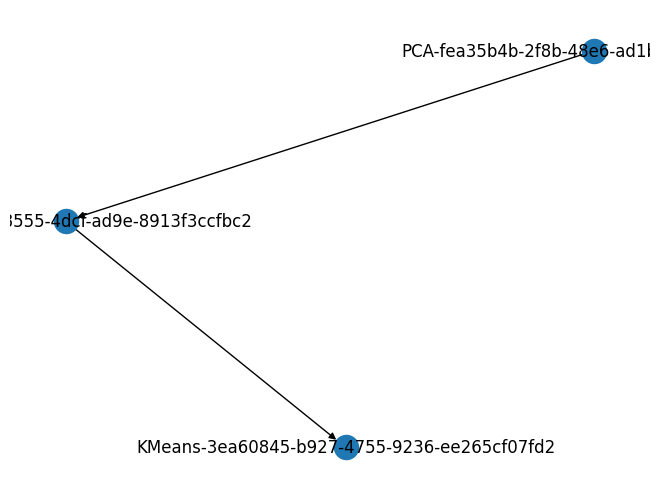

In [12]:
nx.draw(graph.graph, with_labels = True)

In [ ]:
pipes.forward(sample_cube)

In [ ]:
plt.figure()
plt.imshow(pipes.forward(sample_cube), cmap='grey')

In [ ]:
pipes.serialize()

In [ ]:
pipes_load = Pipeline('tomato_test_3')

In [ ]:
pipes_load.load('/home/nathaniel/tomato_test_2024_03_04_16_20_30.zip')

In [ ]:
pipes_load.pipeline

In [ ]:
plt.figure()
plt.imshow(pipes_load.forward(sample_cube), cmap='grey')